# 컴퓨터 그래픽스 및 가시화

## 컴퓨터 그래픽스 개요

### 벡터 그래픽스(Vector Graphics)와 래스터 그래픽스(Raster Graphics)

|래스터 그래픽스|벡터 그래픽스|
|------|---|
|색상을 가지는 점들의 집합으로 이미지를 표현하는 방법|점, 선분, 곡선과 같은 수학적 표현을 이용해 이미지를 표현하는 방법|
|정밀한 이미지를 표현할 수 있다.|확대 및 축소 시에도 이미지가 깨지지 않는다.|

* 래스터 그래픽스로 표현되는 것들: 모니터 화면, 사진 등
* 벡터 그래픽스로 표현되는 것들: 3차원 형상(CAD, 게임, …), 폰트, 도면 등

![poster](https://vectorman.com.au/wp-content/uploads/2021/06/Bitmap-vSVG-300x192.png)

### 그래픽스 하드웨어(Graphics Hardware)

* 입력: 벡터 그래픽스 형태
* GPU(graphics processing unit): 그래픽 연산을 빠르게 처리하여 결과값을 모니터에 출력하는 연산 장치로, 자신만의 그래픽스 메모리(VRAM)를 가진다.
* 픽셀(pixel)
  * 모든 디스플레이 장치(모니터 등)는 래스터 그래픽스 기반으로, 래스터 이미지는 픽셀(pixel)로 구성된다.

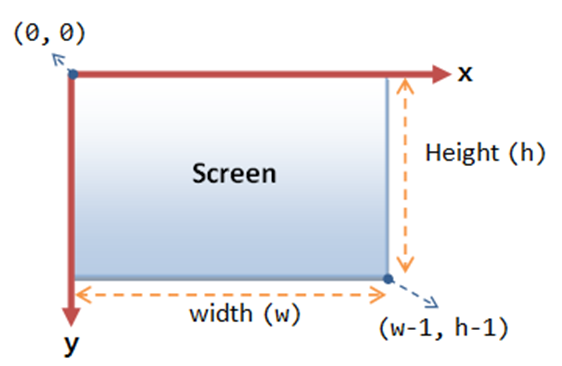

* 프레임 버퍼(frame buffer): 각 픽셀의 색상값이 저장되는 그래픽스 메모리의 특별한 부분으로, GPU는 픽셀의 색상값을 프레임 버퍼에 기록한다.
* 출력: 래스터 그래픽스 형태

![Graphics Hardware](https://www3.ntu.edu.sg/home/ehchua/programming/opengl/images/Graphics3D_Hardware.png)

### 그래픽스 랜더링 파이프라인(Graphics Rendering Pipeline)

* 랜더링(rendering): 3차원 형상 모델로부터 디스플레이 장치 상에 이미지를 만드는 과정
  * 3차원 형상은 삼각형, 선분, 점과 같은 기본 형상(primitive)으로 표현
* 그래픽스 랜더링 파이프라인: 벡터로 표현된 3차원 객체로부터 디스플레이 장치 상에 픽셀을 만드는 과정


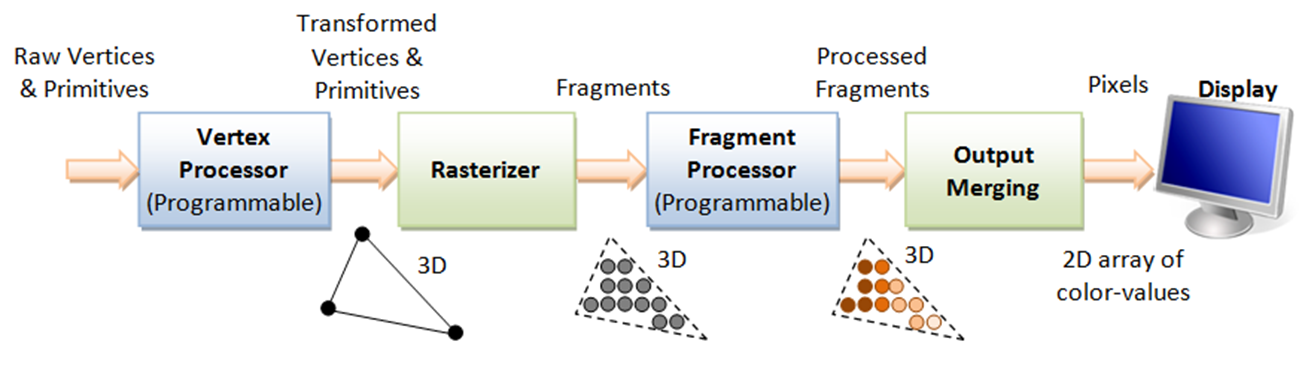

* 꼭지점 처리(vertex processing): 기본 형상(primitive)들의 각 꼭지점을 처리 및 변환한다.
* 레스터화(rasterization): 각 기본 형상을 프레그먼트(fragment)로 변환한다.
  * 프레그먼트: 위치, 색상 등과 같은 속성을 가지는 3차원 공간 상의 픽셀
* 프레그먼트 처리(fragment processing): 각 프레그먼트를 처리한다.
* 출력 병합(output merging): 3차원 공간 상의 모든 기본 형상들의 프레그먼트를 2차원 픽셀로 합친다.

현대 GPU에서는 꼭지점 처리(vertex processing)과 프레그먼트 처리(fragment processing) 단계를 프로그래밍 할 수 있다.

## VTK 설치 및 설정

[VTK(Visualization Toolkit)](https://vtk.org/)는 3차원 그래픽스, 영상 처리 및 가시화를 위한 오픈소스 라이브러리이다. 원래는 C++ 언어로 개발되었으나, 현재는 파이썬에서도 사용할 수 있다.

파이썬에서 VTK를 설치하기 위해서는 VTK를 파이썬 환경에 설치해야 한다. 이를 위해서는 아래 코드와 같이 하면 된다.

In [1]:
!pip install vtk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 6.7 MB/s eta 0:00:00


Colab과 같은 IPython 환경에서 VTK로 생성한 내용을 가시화 하기 위해서는 특별한 모듈이 필요하다. 여러 가지 방법이 있지만 여기서는 [PyVista](https://pyvista.org/)를 이용한다. PyVista를 설치하기 위해 다음을 실행한다.

In [2]:
!apt-get update
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.9 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,378 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu 

VTK와 PyVista를 불러오기 위해 아래와 같이 코드를 실행한다.

In [3]:
import vtk
import pyvista as pv

pv.global_theme.jupyter_backend = 'static'
pv.global_theme.notebook = True
pv.start_xvfb()

설치가 잘 되었는지 확인하기 위해 아래 코드를 실행해보자. 안타깝게도 Colab와 호환 문제로 인해 화면을 돌려볼 수는 없다.

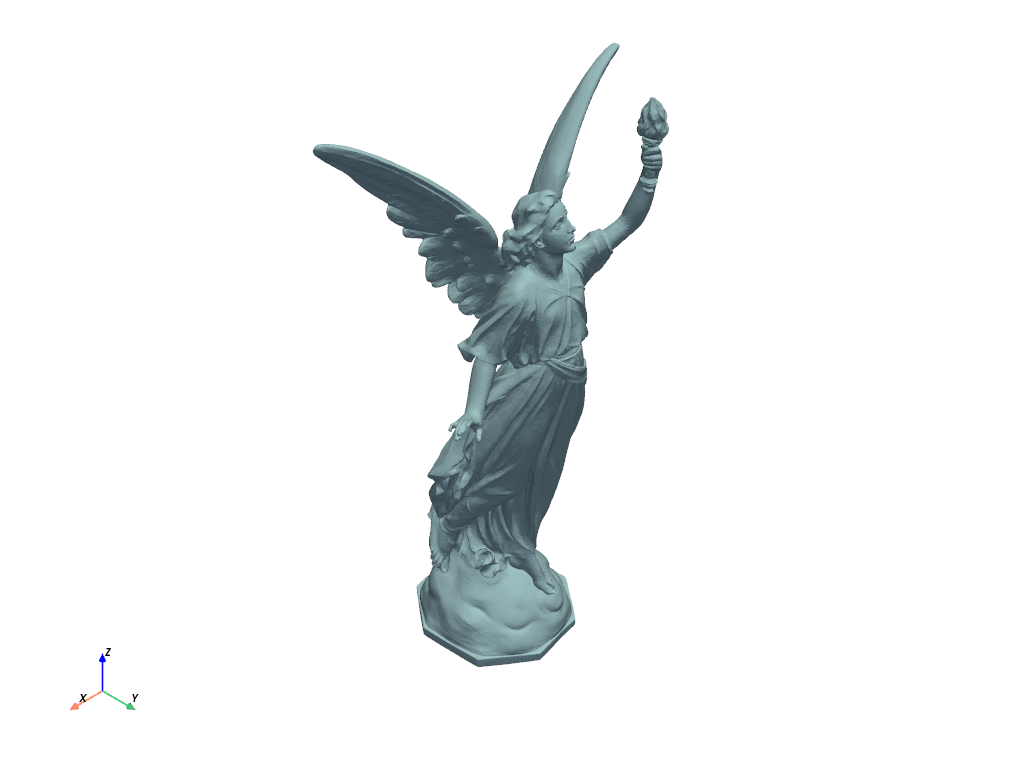

In [4]:
import pyvista.examples
dataset = pyvista.examples.download_lucy()
dataset.plot()

## VTK 구조

### VTK 가시화 파이프라인

VTK는 다음과 같은 순서로 형상을 가시화한다.

1. Sources: 가시화 파이프라인을 통과하는 데이터 소스
2. Filters: 데이터를 받아 변경한 후 다른 데이터로 출력
3. Mappers: 데이터를 랜더링 할 수 있는 형태로 변환
4. Actors: 랜더링되는 데이터
5. Renderers & Windows: 사용자가 화면에서 보는 부분

<br/>  

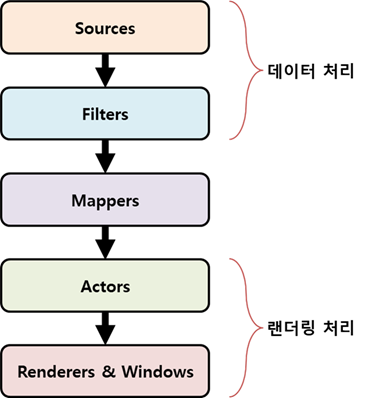

### Sources

Source는 데이터를 제공하는 역할을 한다. 크게 두 가지 방법이 있다.

첫 번째 방법은 Procedural Source를 이용하는 방법이 있다. 이는 데이터를 직접 생성하는 방법이다. *vtkConeSource*, *vtkCylinderSource*, … 등과 같은 클래스를 이용한다.

아래 코드는 *vtkCylinderSource* 클래스를 이용해 원통 형상을 생성한다. 마지막에 *update()* 함수를 호출해야 한다.
(그러나 화면에 보이는 것은 없다.)

In [5]:
source = vtk.vtkCylinderSource() # vtkCylinderSource를 생성한다.
source.SetRadius(10) # 반지름을 설정한다.
source.SetHeight(50) # 높이를 설정한다.
source.SetResolution(8) # 원을 몇 개의 선분으로 표현할 것인지, 해상도를 설정한다.
source.Update() # 원통을 생성한다.

두 번째 방법은 Reader를 이용하는 방법이 있다. 이는 파일에서 데이터를 읽어오는 방법이다. *vtkSTLReader*, *vtkOBJReader* 등과 같은 클래스를 이용한다.

```python
reader = vtk.vtkXMLPolyDataReader()
reader.SetFileName("Lucy.vtp")
reader.Update()
```

이 수업에서 사용하는 Source들은 *vtkPolyData* 타입을 출력한다.

### Filters

Filter는 데이터를 변경하는 기능을 제공한다. *vtkPolyData* 타입의 데이터를 입력으로 받고, 이를 처리한 다음, 변경된 데이터를 *vtkPolyData* 타입으로 출력한다. 매우 많은 기능들이 있으며 대표적으로 다음과 같은 기능들을 제공한다.

* 데이터의 일부만 추출
* 데이터 서브샘플링(subsampling)
* 데이터 보간
* 여러 데이터 병합
* 한 개의 데이터를 여러 개로 분할
* 변환
* …

아래 코드는 *vtkClipDataSet* 필터를 이용해 위에서 만든 원통을 평면으로 자르는 기능을 보여준다.

(역시 아무것도 보이지 않는다.)

In [6]:
# 자를 기준이 되는 평면을 생성한다.
plane = vtk.vtkPlane() # vtkPlane을 생성한다.
plane.SetOrigin(0, 0, 0) # 평면의 원점
plane.SetNormal(1, 0, 0) # 평면의 방향

filter = vtk.vtkClipDataSet() # vtkClipDataSet을 생성한다.
filter.SetInputData(source.GetOutput()) # 앞에서 만든 source의 출력을 입력으로 설정한다.
filter.SetClipFunction(plane) # plane을 자르는 기준으로 설정한다.
filter.Update() # 실행한다.

### Mappers

Mapper는 데이터를 랜더링 할 수 있는 형태로 변환시킨다. 이때, 랜더링 옵션을 설정할 수 있다. 그리고 입력 데이터의 형태에 맞게 Mapper의 종류를 선택해야 한다.

* 입력 데이터가 *vtkPolyData* 이면 *vtkPolyDataMapper* 클래스 사용
* 입력 데이터가 *vtkDataSet* 이면 *vtkDataSetMapper* 클래스 사용

아래 코드는 위의 코드에서 만든 잘린 원통을 가시화 데이터로 변환하는 것을 보여준다.

In [7]:
mapper = vtk.vtkDataSetMapper()
mapper.SetInputData(filter.GetOutput()) # filter의 출력을 mapper의 입력으로 설정한다.
mapper.Update() # mapper를 실행한다.

### Actors

Actor는 실제로 랜더링되는 객체이다. 주로 Mapper를 화면에 보여주는 역할을 한다. 또한, 화면에 보이는 속성(색상, 투명도, 위치, ...)을 설정할 수 있다. 주로 *vtkActor* 클래스를 이용한다.

아래 코드는 위에서 만든 Mapper를 이용해 Actor를 생성하는 것을 보여준다.

In [8]:
actor = vtk.vtkActor() # vtkActor를 생성한다.
actor.SetMapper(mapper) # 앞에서 만든 mapper를 actor에 연결한다.
actor.GetProperty().SetColor(1, 0, 0) # actor의 속성(property) 중 색상(color)을 빨간색으로 설정한다.
actor.GetProperty().SetOpacity(0.5) # actor의 속성(property) 중 불투명도를 0.5로 설정한다.

### Renderers & Windows

Actor를 화면에 표시하기 위해서는 Renderer와 Window를 생성해야 하지만, Colab과 같은 IPython 환경에서는 다르게 처리해 줘야 한다. 이를 위해 PyVista를 이용한다.

아래 코드와 같이하면 *Plotter* 내부에 *vtkRenderer*가 생성된다.

In [9]:
plotter = pv.Plotter(window_size=(300, 300)) # Plotter를 생성한다. 이때, 창의 크기를 (300, 300)으로 한다.

위에서 만든 Actor를 추가하기 위해 아래와 같이 한다.

In [10]:
plotter.add_actor(actor) # actor를 추가한다.

(<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x80a8880) at 0x7b42772fba60>,
 <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLProperty(0x81813f0) at 0x7b427833d060>)

그리고 가시화에 필요한 설정을 추가한다.

In [11]:
plotter.set_background([0, 0, 0]) # 배경색을 검정색으로 변경한다.
plotter.reset_camera() # 화면에 잘 보이도록 카메라를 설정한다.

화면에 보여주기 위해서는 *show()* 함수를 호출한다.

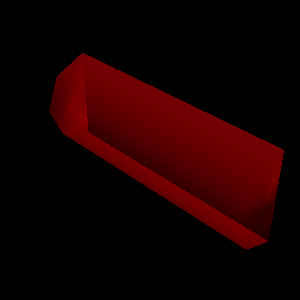

In [12]:
plotter.show()

## VTK를 이용한 컴퓨터 그래픽스

### 형상 표현

컴퓨터 그래픽스에서 3차원 형상은 기본 형상들로 표현된다.
* 기본 형상은 꼭지점들로 표현된다. (그래픽스에서의 꼭지점은 VTK의 꼭지점과 약간 다른 의미를 갖는다.)
* 기본 형상에는 점, 선분, 닫힌 다각형이 있다.
* 각 꼭지점은 위치, 색상, 법선 벡터, 텍스쳐 좌표 등의 속성을 갖는다.
* 다각형을 구성하는 꼭지점들은 다각형을 외부에서 봤을 때, 반시계 방향으로 정의된다.

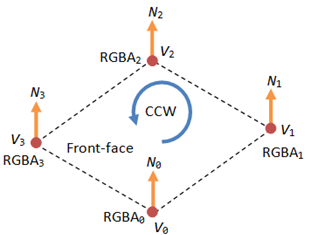

### VTK에서 형상 표현




VTK에서 형상을 표현할 때에는 기하 정보와 위상 정보를 이용한다.

* 기하(geometry) 정보: 점 좌표 목록 (그래픽스의 꼭지점 목록)
* 위상(topology) 정보: 점들 간의 연결 관계
  * VTK에서는 기본 형상을 Cell로 표현
  * 한 개의 3차원 형상을 *vtkPolyData*로 표현



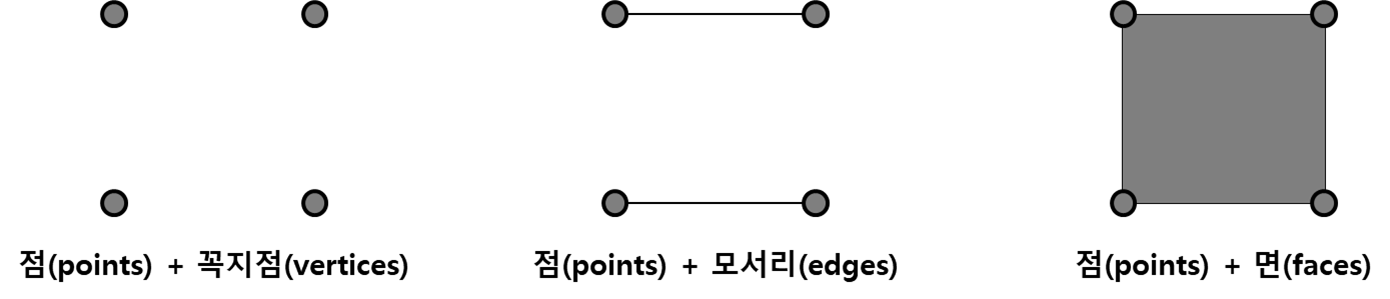

### 기하 정보

기하 정보는 점들의 목록으로 표현하며, 이는 *vtkPoints* 클래스를 이용해 표현한다.

In [13]:
points = vtk.vtkPoints()

points.InsertNextPoint(0, 0, 0) # 점 0번
points.InsertNextPoint(1, 0, 0) # 점 1번
points.InsertNextPoint(1, 1, 0) # 점 2번
points.InsertNextPoint(0, 1, 0) # 점 3번

points.InsertNextPoint(0, 0, 1) # 점 4번
points.InsertNextPoint(1, 0, 1) # 점 5번
points.InsertNextPoint(1, 1, 1) # 점 6번
points.InsertNextPoint(0, 1, 1) # 점 7번

points.InsertNextPoint(0, 0, 2) # 점 8번
points.InsertNextPoint(1, 0, 2) # 점 9번
points.InsertNextPoint(1, 1, 2) # 점 10번
points.InsertNextPoint(0, 1, 2) # 점 11번


11

### 면(Faces) 생성

면은 닫힌 다각형을 표현하며, *vtkCellArray* 클래스를 이용해 위상 정보를 만들 수 있다.

In [14]:
faces = vtk.vtkCellArray()

faces.InsertNextCell(4)   # 4개의 점으로 구성된 형상. 즉, 사각형
faces.InsertCellPoint(0)  # 점 0번
faces.InsertCellPoint(1)  # 점 3번
faces.InsertCellPoint(2)  # 점 2번
faces.InsertCellPoint(3)  # 점 1번

형상을 구성하기 위해서는 *vtkPolyData*를 생성해야 한다. 이때, 기하 정보인 점 목록은 *vtkPolyData*의 *SetPoints()* 함수로 연결하고, 면 정보는 *SetPolys()* 함수를 이용해 연결한다.

In [15]:
polyData = vtk.vtkPolyData()
polyData.SetPoints(points) # 점 목록을 설정한다.
polyData.SetPolys(faces) # 다각형을 설정한다.

이를 가시화 하기 위해서는 앞에서 했던 것과 같이, Mapper와 Actor를 만들어 연결해 줘야 한다.

In [16]:
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(polyData)
mapper.Update()

actor = vtk.vtkActor()
actor.SetMapper(mapper)

가시화 하는 함수를 만들어 이용한다.

In [17]:
def show(actors, dont_show = False):
  plotter = pv.Plotter(window_size=(300, 300))
  for actor in actors:
    plotter.add_actor(actor)
  plotter.set_background([0, 0, 0])
  plotter.add_axes_at_origin()
  plotter.reset_camera()

  if not dont_show:
    plotter.show()

  return plotter

위에서 만든 *actor*를 가시화 한다.

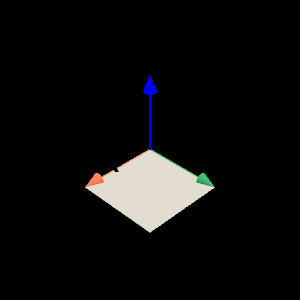

In [18]:
show([actor])

### 모서리(Edges) 생성

모서리는 연결된 선분을 나타내며, *vtkCellArray* 클래스를 이용해 모서리에 대한 위상 정보를 만들 수 있다. 이때, *vtkPolyData*의 *SetLines()* 함수를 이용해 연결한다.

In [19]:
edges = vtk.vtkCellArray()

edges.InsertNextCell(4)   # 2개의 점으로 구성된 선분
edges.InsertCellPoint(4)  # 점 4번
edges.InsertCellPoint(5)  # 점 5번
edges.InsertCellPoint(6)  # 점 6번
edges.InsertCellPoint(7)  # 점 7번

polyData.SetLines(edges) # 이전에 만든 polyData에 edges를 설정한다.

앞에 만든 mapper를 다시 업데이트 한다.

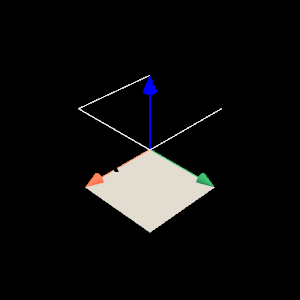

In [20]:
mapper.SetInputData(polyData) # 입력 데이터를 다시 설정한다.
mapper.Update() # 업데이트 한다.

show([actor])

### 꼭지점(Vertices) 생성

꼭지점도 동일하게 *vtkCellArray* 클래스를 이용해 만들 수 있다. 이때, *vtkPolyData*의 *SetVerts()* 함수를 이용해 연결한다.

**주의: SetPoints() 함수를 이용해 점 목록을 연결해도 점이 화면에 표시되지 않는다.**

In [21]:
vertices = vtk.vtkCellArray()

vertices.InsertNextCell(1)
vertices.InsertCellPoint(8)

vertices.InsertNextCell(1)
vertices.InsertCellPoint(9)

vertices.InsertNextCell(1)
vertices.InsertCellPoint(10)

vertices.InsertNextCell(1)
vertices.InsertCellPoint(11)

polyData.SetVerts(vertices) # 이전에 만든 polyData에 vertices를 설정한다.

앞에 만든 mapper를 다시 업데이트 한다.

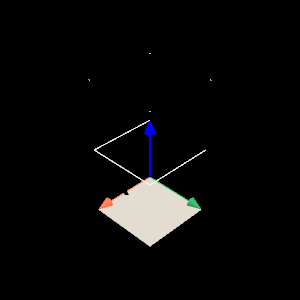

In [22]:
mapper.SetInputData(polyData) # 입력 데이터를 다시 설정한다.
mapper.Update() # 업데이트 한다.

show([actor])

## 꼭지점 처리(Vertex Processing)

### 좌표 변환(Coordinates Transform)

3차원 장면을 생성할 때, 다양한 변환이 적용된다. 랜더러(renderer) 마다 다를 수 있지만 보통 4단계로 구성된다.

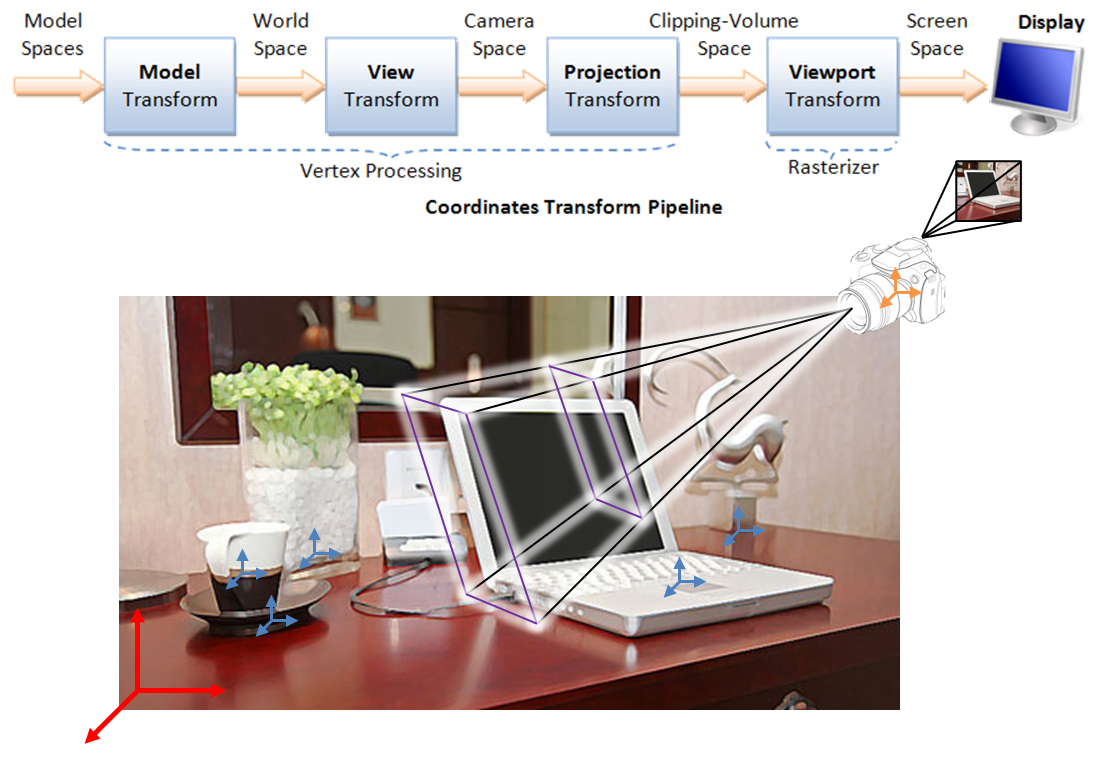

#### 모델 변환(Model Transform)

* 물체를 전역 공간(world space) 상에 배치하는 단계이다.
* 물체는 자신만의 좌표계, 즉 모델 공간(model space)을 기준으로 그려진다.
* 물체를 장면 상에 배치하기 위해서는, **모델 공간에서 전역 공간으로 변환** 필요하다.
* 이전 수업에서 배운 **변환 행렬**로 물체를 배치한다.

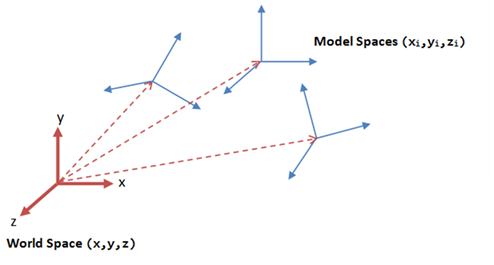

VTK에서는 *vtkTransform* 클래스로 변환을 표현한다. 그리고 *vtkActor*의 **SetUserTransform()** 함수를 사용한다.

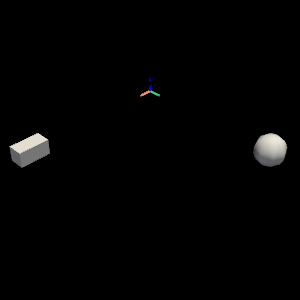

In [23]:
# 박스 형상 생성
cubeSource = vtk.vtkCubeSource()
cubeSource.SetCenter(0, 0, 0)
cubeSource.SetXLength(1)
cubeSource.SetYLength(1)
cubeSource.SetZLength(1)
cubeSource.Update()

# Mapper 연결
cubeMapper = vtk.vtkPolyDataMapper()
cubeMapper.SetInputData(cubeSource.GetOutput())
cubeMapper.Update()

# 변환을 표현한다.
cubeTransform = vtk.vtkTransform()
cubeTransform.Translate(10, 0, 0)
cubeTransform.Scale(2, 1, 1)

# Actor 생성
cubeActor = vtk.vtkActor()
cubeActor.SetMapper(cubeMapper)
cubeActor.SetUserTransform(cubeTransform) # 변환을 적용한다.

# 구 형상 생성
sphereSource = vtk.vtkSphereSource()
sphereSource.SetCenter(0, 0, 0)
sphereSource.SetRadius(1)
sphereSource.Update()

# Mapper 연결
sphereMapper = vtk.vtkPolyDataMapper()
sphereMapper.SetInputData(sphereSource.GetOutput())
sphereMapper.Update()

# 변환을 표현한다.
sphereTransform = vtk.vtkTransform()
sphereTransform.Translate(0, 10, 0) # 변환을 적용한다.

# Actor 생성
sphereActor = vtk.vtkActor()
sphereActor.SetMapper(sphereMapper)
sphereActor.SetUserTransform(sphereTransform)

show([cubeActor, sphereActor])

#### 뷰 변환(View Transform)

카메라의 위치와 방향을 선정한 후, 카메라 공간(camera space)으로 변환하는 것으로, 카메라 위치에서 전역 공간을 본다.

카메라 위치는 세 개의 벡터로 정의한다. (전역 공간 기준)

* 카메라 위치: $EYE(e_x, e_y, e_z)$
* 카메라가 보는 곳: $AT(a_x, a_y, a_z)$
* 카메라의 윗 방향: $UP(u_x, u_y, u_z)$

카메라 좌표계를 다음과 같이 계산할 수 있다.

$$
\begin{align}
z^c &= \frac{EYE - AT}{\|EYE - AT\|}\\
x^c &= \frac{UP × z^c}{\|UP × z^c\|}\\
y^c &= z^c \times x^c
\end{align}
$$

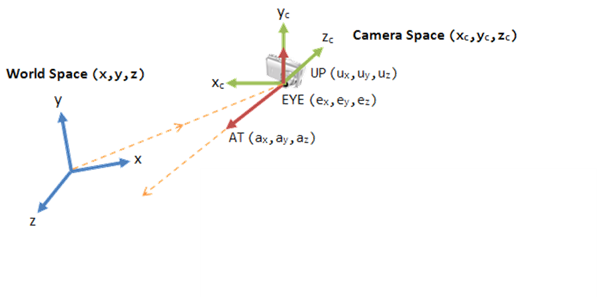

따라서 전역 공간을 카메라 좌표계에서 봤을 때의 좌표로 변환하면 다음과 같다.

$$
p^w = \begin{bmatrix}
  1 & 0 & 0 & e_x \\
  0 & 1 & 0 & e_y \\
  0 & 0 & 1 & e_z \\
  0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
  x^c_x & y^c_x & z^c_x & 0 \\
  x^c_y & y^c_y & z^c_y & 0 \\
  x^c_z & y^c_z & z^c_z & 0 \\
  0 & 0 & 0 & 1
\end{bmatrix}
p^c
$$

$$
\therefore
p^c = \begin{bmatrix}
  x^c_x & x^c_y & x^c_z & 0 \\
  y^c_x & y^c_y & y^c_z & 0 \\
  z^c_x & z^c_y & z^c_z & 0 \\
  0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
  1 & 0 & 0 & -e_x \\
  0 & 1 & 0 & -e_y \\
  0 & 0 & 1 & -e_z \\
  0 & 0 & 0 & 1
\end{bmatrix}
p^w
$$

$$
M_{view}=\begin{bmatrix}
  x^c_x & x^c_y & x^c_z & -e_x x_c \\
  y^c_x & y^c_y & y^c_z & -e_y y_c \\
  z^c_x & z^c_y & z^c_z & -e_z z_c \\
  0 & 0 & 0 & 1
\end{bmatrix}
$$

VTK에서는 *vtkCamera* 클래스를 이용해 카메라 좌표를 설정할 수 있다.

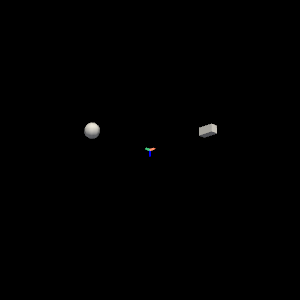

In [24]:
plotter = show([cubeActor, sphereActor], dont_show=True)
camera = plotter.camera # 카메라를 가져온다.
camera.position = (50, 50, 25) # 카메라 위치
camera.focal_point = (0, 0, 0) # 카메라가 보는 곳
camera.up = (0, 0, -1) # 카메라의 윗 방향
plotter.show()

#### 투영 변환(Projection Transform)

카메라 렌즈를 선택하는 것과 유사한 개념이다: 광각 렌즈, 망원 렌즈, FOV 등

원근 투영(perspective projection)과 직교 투영(orthographic projection)이 있다.

##### 원근 투영(Perspective Projection)

가까운 물체가 먼 물체보다 더 크게 보이도록 하는 투영 변환이다.
* 뷰 절두체(view frustum) 내의 물체만 보이도록 한다.
  * fovy(degree), aspect(종횡비, 가로/세로), zNear(항상 +), zFar(항상 +)로 정의
  * View frustum culling 적용

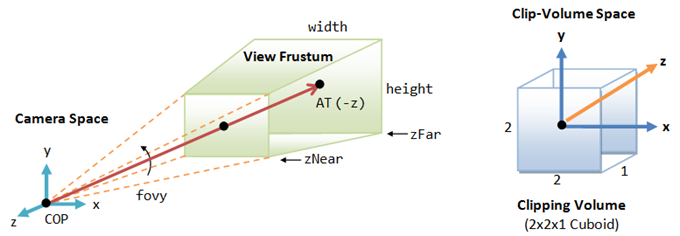

원근 투영을 통해 크기가 2x2x1인 육면체 공간으로 변환된다. 이때, zNear에서 $z=0$이 되고, zFar에서 $z=1$이 된다.

(랜더링 엔진에 따라서 z 값을 -1~1로 변환하기도 한다.)

다음 투영 변환 행렬이 적용된다:

$$
M_{proj}=\begin{bmatrix}
\frac{cot(fovy/2)}{aspect}&0&0&0\\
0&cot(fovy/2)&0&0\\
0&0&-\frac{zFar}{zFar-zNear}&-\frac{zNear\times zFar}{zFar-zNear}\\
0&0&-1&0
\end{bmatrix}
$$

##### 직교 투영(Orthographic Projection)

카메라가 대상으로부터 매우 먼 거리에 있는 특수한 투영 변환으로, 뷰 영역이 직육면체이다.

* xLeft, xRight, yBottom, yTop, zNear, zFar로 정의
크기가 2x2x2인 육면체 공간으로 변환된다.

  (z값의 범위는 랜더링 엔진마다 다를 수 있다.)

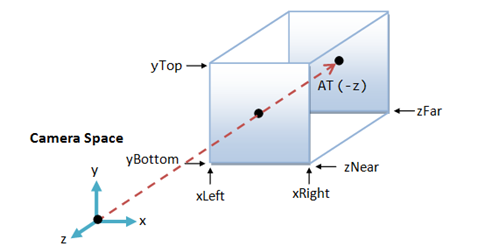

다음 투영 변환 행렬이 적용된다:

$$
M_{proj}=\begin{bmatrix}
\frac{2}{xRight-xLeft}&0&0&-\frac{xRight+xLeft}{xRight-xLeft}\\
0&\frac{2}{yTop-yBottom}&0&-\frac{yTop+yBottom}{yTop-yBottom}\\
0&0&\frac{-2}{zFar-zNear}&\frac{zFar+zNear}{zFar-zNear}\\
0&0&0&1
\end{bmatrix}
$$

VTK에서도 투영 변환을 설정할 수 있다.

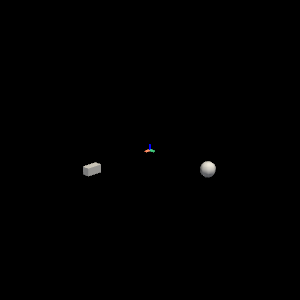

In [25]:
plotter = show([cubeActor, sphereActor], dont_show=True)
camera = plotter.camera # 카메라를 가져온다.
camera.ParallelProjectionOff() # 원근 투영 적용: Off를 On으로 변경해 볼 것
camera.position = (50, 50, 25) # 카메라 위치
camera.focal_point = (0, 0, 0) # 카메라가 보는 곳
camera.up = (0, 0, 1) # 카메라의 윗 방향
camera.SetClippingRange(0.1, 100) # zNear와 zFar: zFar를 100에서 68으로 변경해 볼 것
camera.SetViewAngle(30) # Fovy: 30도에서 60도로 변경해 볼 것
plotter.show()

#### Vertex Processing의 출력

각 꼭지점은 클리핑 볼륨 공간 안에 배치된다. 주로, x-와 y-좌표는 -1에서 +1 사이가 되게 하고, z-좌표는 0(zNear)에서 1(zFar)이 되게 한다.

## 레스터화(Rasterization)

레스터와 단계에서는 꼭지점으로 정의된 각 기본 형상들이 레스터 스캔(raster-scan)을 통해 프레그먼트(fragment)들로 변환된다.

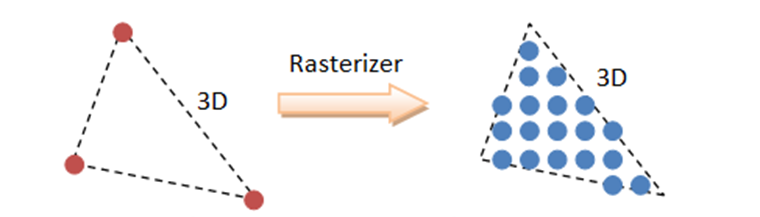

### 꼭지점 속성 설정

각 꼭지점(VTK에서는 점)에는 색상, 법선 벡터 등과 같은 속성을 부여할 수 있다. 이는 나중에 랜더링 할 때 영향을 미친다.

(Mapper가 꼭지점의 속성을 이용해 랜더링 정보를 생성하는 방법을 결정한다.)

각 꼭지점에 색상을 부여할 때에는 Actor의 Property로 정의하는 색상은 작동하지 않는다.

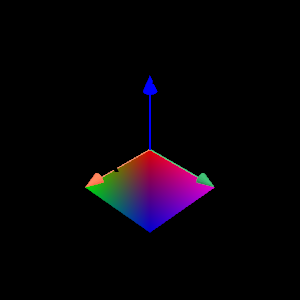

In [26]:
# 점 목록
points = vtk.vtkPoints()

points.InsertNextPoint(0, 0, 0) # 점 0번
points.InsertNextPoint(1, 0, 0) # 점 1번
points.InsertNextPoint(1, 1, 0) # 점 2번
points.InsertNextPoint(0, 1, 0) # 점 3번

# 색상 부여
colors = vtk.vtkUnsignedCharArray() # 배열을 만든다.
colors.SetNumberOfComponents(3) # 색상은 3개의 값을 가진다.
colors.SetName("Colors") # 이름을 Colors로 설정한다.
# vtkPoints의 입력한 각 점과 일치하는 순서대로 색상을 입력한다.
colors.InsertNextTuple3(255, 0, 0)
colors.InsertNextTuple3(0, 255, 0)
colors.InsertNextTuple3(0, 0, 255)
colors.InsertNextTuple3(255, 0, 255)

# 법선 부여
normals = vtk.vtkFloatArray()
normals.SetNumberOfComponents(3) # 법선은 3개의 값을 가진다.
normals.SetName("Normals")
# vtkPoints의 입력한 각 점과 일치하는 순서대로 법선을 입력한다.
normals.InsertNextTuple3(0, 0, 1)
normals.InsertNextTuple3(0, 0, 1)
normals.InsertNextTuple3(0, 0, 1)
normals.InsertNextTuple3(0, 0, 1)

# 면 생성
faces = vtk.vtkCellArray()
faces.InsertNextCell(4)   # 4개의 점으로 구성된 형상. 즉, 사각형
faces.InsertCellPoint(0)  # 점 0번
faces.InsertCellPoint(1)  # 점 3번
faces.InsertCellPoint(2)  # 점 2번
faces.InsertCellPoint(3)  # 점 1번

polyData = vtk.vtkPolyData()
polyData.SetPoints(points) # 점 목록을 설정한다.
polyData.GetPointData().SetScalars(colors) # 점과 색상을 연결한다.
polyData.GetPointData().SetNormals(normals) # 점과 법선 벡터를 연결한다.
polyData.SetPolys(faces) # 다각형을 설정한다.

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(polyData)
mapper.Update()

actor = vtk.vtkActor()
actor.SetMapper(mapper)

show([actor])

### 뷰포트 변환(Viewport Transform)

#### 뷰포트(viewport)

응용 프로그램 상의 사각형 디스플레이 영역으로, 화면 공간(screen space)에 표현된다. 이때, 화면 전체 또는 일부가 될 수 있다.

#### 뷰포트 변환

뷰포트 변환은 clipping-volume 공간(2x2x1)에서 3차원 화면 공간(screen space)으로 변환시킨다. 이때, y-축 방향은 위에서 아래로 향한다.

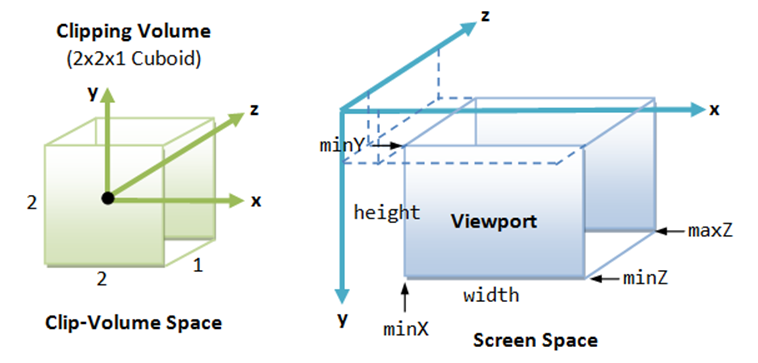

y-축 대칭:
$$
M_1=\begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & -1 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1
\end{bmatrix}
$$

x-, y-, z-축 확대/축소:
$$
M_2=\begin{bmatrix}
  w/2 & 0 & 0 & 0 \\
  0 & h/2 & 0 & 0 \\
  0 & 0 & maxZ-minZ & 0 \\
  0 & 0 & 0 & 1
\end{bmatrix}
$$

원점 이동:
$$
M_3=\begin{bmatrix}
  1 & 0 & 0 & minX+w/2 \\
  0 & 1 & 0 & minY+h/2 \\
  0 & 0 & 1 & minZ \\
  0 & 0 & 0 & 1
\end{bmatrix}
$$

뷰포트 변환:
$$
M_{viewport}=M_3M_3M_1=\begin{bmatrix}
  w/2 & 0 & 0 & minX+w/2 \\
  0 & -h/2 & 0 & minY+h/2 \\
  0 & 0 & maxZ-minZ & minZ \\
  0 & 0 & 0 & 1
\end{bmatrix}
$$

#### 종횡비(Aspect Ratio)

뷰포트의 종횡비와 뷰 영역의 종횡비가 다르면, 형상이 외곡된다. 따라서 두 영역 간에 종횡비를 맞춰주는 것이 중요하다.

VTK에서는 *vtkRenderer*의 **SetViewport()** 함수를 이용해 뷰포트를 설정한다. 그리고 종횡비는 자동으로 맞춰진다.

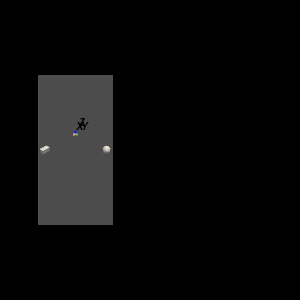

In [29]:
plotter = show([cubeActor, sphereActor], dont_show=True)
plotter.renderer.SetViewport(0.125, 0.25, 0.375, 0.75)
plotter.set_background([0.3, 0.3, 0.3])
plotter.show()

### Back-Face Culling

* View frustum culling: 뷰 영역 밖에 있는 형상을 제거하는 것
* Back-face culling: 카메라에서 보이지 않는 후면을 제거하는 기법
  * 후면 제거를 통해 랜더링 시간을 줄일 수 있다.

후면은 각 면의 법선 방향과 카메라 방향 간의 각도를 보고 판단한다.

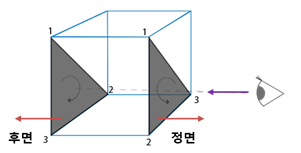

* 정면 - 카메라 방향과 면의 법선 방향이 90도~270도 사이에 있을 때
* 후면 - 카메라 방향과 면의 법선 방향이 -90도~90도 사이에 있을 때
  * 정면과 후면의 방향은 정의에 따라 반대가 될 수 있다. 따라서 위상 정보 정의할 때 **점의 순서가 중요**하다.

VTK에서는 *vtkActor*의 Property를 통해 설정 가능하다.

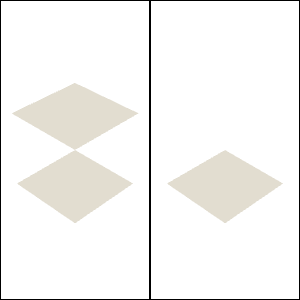

In [30]:
points = vtk.vtkPoints()

points.InsertNextPoint(0, 0, 0) # 점 0번
points.InsertNextPoint(1, 0, 0) # 점 1번
points.InsertNextPoint(1, 1, 0) # 점 2번
points.InsertNextPoint(0, 1, 0) # 점 3번

points.InsertNextPoint(0, 0, 1) # 점 4번
points.InsertNextPoint(1, 0, 1) # 점 5번
points.InsertNextPoint(1, 1, 1) # 점 6번
points.InsertNextPoint(0, 1, 1) # 점 7번

faces = vtk.vtkCellArray()

faces.InsertNextCell(4)   # 4개의 점으로 구성된 형상. 즉, 사각형
faces.InsertCellPoint(0)  # 점 0번
faces.InsertCellPoint(1)  # 점 3번
faces.InsertCellPoint(2)  # 점 2번
faces.InsertCellPoint(3)  # 점 1번

faces.InsertNextCell(4)   # 4개의 점으로 구성된 형상. 즉, 사각형. 그러나 방향을 반대로 한다.
faces.InsertCellPoint(4)  # 점 4번
faces.InsertCellPoint(7)  # 점 7번
faces.InsertCellPoint(6)  # 점 6번
faces.InsertCellPoint(5)  # 점 5번

polyData = vtk.vtkPolyData()
polyData.SetPoints(points) # 점 목록을 설정한다.
polyData.SetPolys(faces) # 다각형을 설정한다.

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(polyData)
mapper.Update()

actor1 = vtk.vtkActor()
actor1.SetMapper(mapper)

actor2 = vtk.vtkActor()
actor2.SetMapper(mapper)
actor2.GetProperty().BackfaceCullingOn() # Back-face culling 적용

plotter = pv.Plotter(shape=(1, 2), window_size=(300, 300))
plotter.subplot(0, 0)
plotter.add_actor(actor1)
plotter.subplot(0, 1)
plotter.add_actor(actor2)
plotter.show()

## 프레그먼트 처리(Fragment Processing)

레스터화 이후, 각 단위 형상에 대한 프레그먼트들을 얻는다. 프레그먼트 처리에서는 주로 텍스쳐(texture)와 조명(lighting)을 처리한다. 그 외에도 scissor test, alpha test, stencil test, depth buffer test, blending, ... 등이 처리된다.

### 텍스쳐(texture)
* 텍스쳐 매핑(texture mapping): 삼차원 물체의 표현에 질감을 입히는 기법

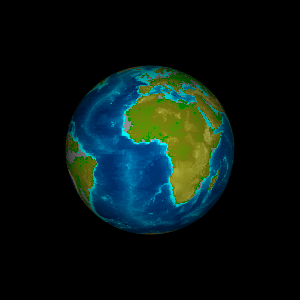

### 조명(Lighting)

조명은 광원과 물체 간의 상호작용으로 형상이 보이기 위해서는 빛이 필요하다.
* 빛이 물체에 반사되어 눈에 들어오면 물체가 보이게 됨
* 빛이 반사되는 방향은 물체의 법선 방향이 결정
* 물체의 재질(material)에 따라 반사되는 빛의 양이 달라짐

#### Phong Lighting Model

* 지역 조명 모델(local illumination model): 직접 광만을 고려한 간단한 조명 모델
* 전역 조명 모델(global illumination model): 간접 광까지 고려한 현실 세계의 조명 모델

Phong lighting model은 지역 조명 모델을 표현하는 간단한 조명 모델이다. 형상의 각 점에 대한 색상은 형상의 반사도(reflection)와 빛의 상호작용으로 결정된다. 형상의 반사도는 재질(material)로 표현한다.

Phong lighting model은 크게 3가지 조명을 고려하는데 이와 함께 3가지 재질이 함께 상호작용한다. 그리고 최종 색상은 모든 상호작용 결과의 합으로 계산한다.

##### 환경광(ambient light)

일정한 빛의 세기와 일정한 색상을 갖으면서 모든 방향으로 퍼져나가는 광원
* 전체 공간에 영향을 줌: 전역 광원
* 실제 환경광은 계산이 어려움: 수없이 많은 반사를 거치기 때문
* 단순화 시키기 위해 전체 공간을 동일하게 처리: 모든 객체가 동일하게 영향을 받는 것으로 가정

환경광에 의한 색상은 환경광의 강도와 환경광 반사 계수로 다음과 같이 결정된다.

$$
I_a=k_ai_a
$$

여기서, $i_a$는 환경광의 강도(색상으로 표현), $k_a$는 환경광 반사 계수 또는 환경광 재질이다. 환경광 재질은 실제 물리적인 성질과 관련은 없다.

(랜더링 엔진마다 재질을 표현하는 방법이 다를 수 있다.)

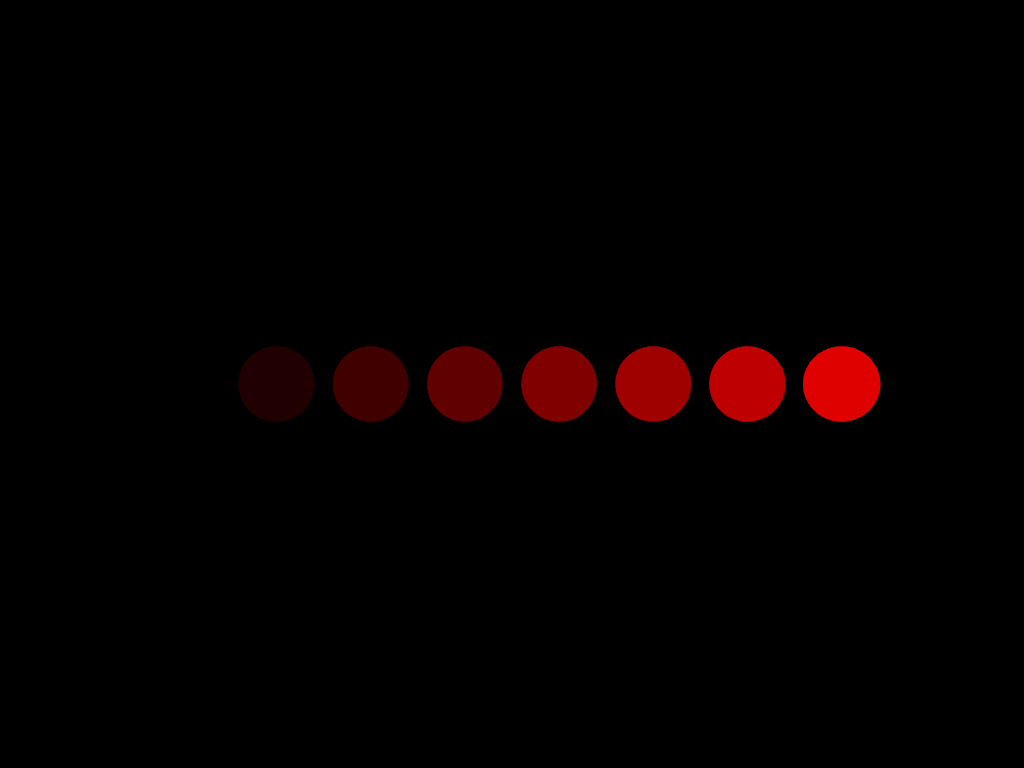

In [31]:
# 구를 만든다.
sphere = vtk.vtkSphereSource()
sphere.SetThetaResolution(100)
sphere.SetPhiResolution(50)
sphere.Update()

# Mapper 생성
sphereMapper = vtk.vtkPolyDataMapper()
sphereMapper.SetInputData(sphere.GetOutput())
sphereMapper.Update()

plotter = pv.Plotter()
plotter.set_background([0, 0, 0]) # 배경색을 검정색으로 변경한다.

ambient = 0.0 # 환경광 반사 계수
position = [0, 0, 0]

for i in range(0, 2):
  for j in range(0, 4):
    actor = vtk.vtkActor()
    actor.SetMapper(sphereMapper)
    actor.GetProperty().SetColor(1, 0, 0)
    actor.GetProperty().SetAmbient(ambient) # 환경광 반사 계수
    actor.GetProperty().SetDiffuse(0.0) # 다른 재질 영향을 제거하기 위해 0으로 한다.
    actor.GetProperty().SetSpecular(0.0) # 다른 재질 영향을 제거하기 위해 0으로 한다.
    actor.SetPosition(position)

    plotter.add_actor(actor)

    ambient += 0.125
    position[0] += 1.25

plotter.view_xy()
plotter.show()

위 코드를 실행한 결과를 보면, 구 전체에 동일한 색상이 적용되는 것을 확인할 수 있다.

##### 난반사광(diffuse light)

방향성을 가지는 광원으로, 형상에 반사될 때, 모든 방향으로 고르게 반사된다. 따라서 어느 방향에서 바라봐도 물체의 명함이나 색조가 변하지 않는다.

$$
I_d = k_d(L⋅N)i_d
$$

여기서 $k_d$는 난반사광 계수, $i_d$는 난반사광의 강도, $L$은 광원 방향에 대한 벡터, $N$은 형상 표면의 법선 벡터이다.

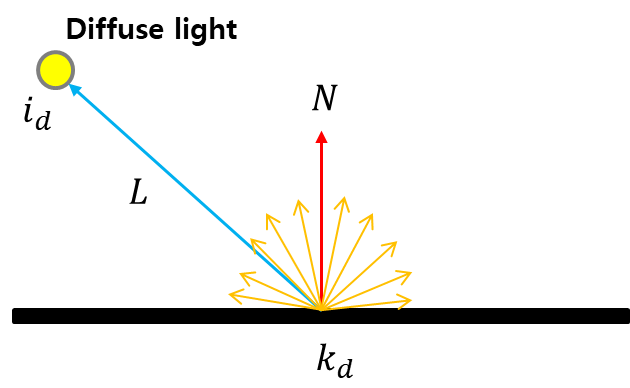

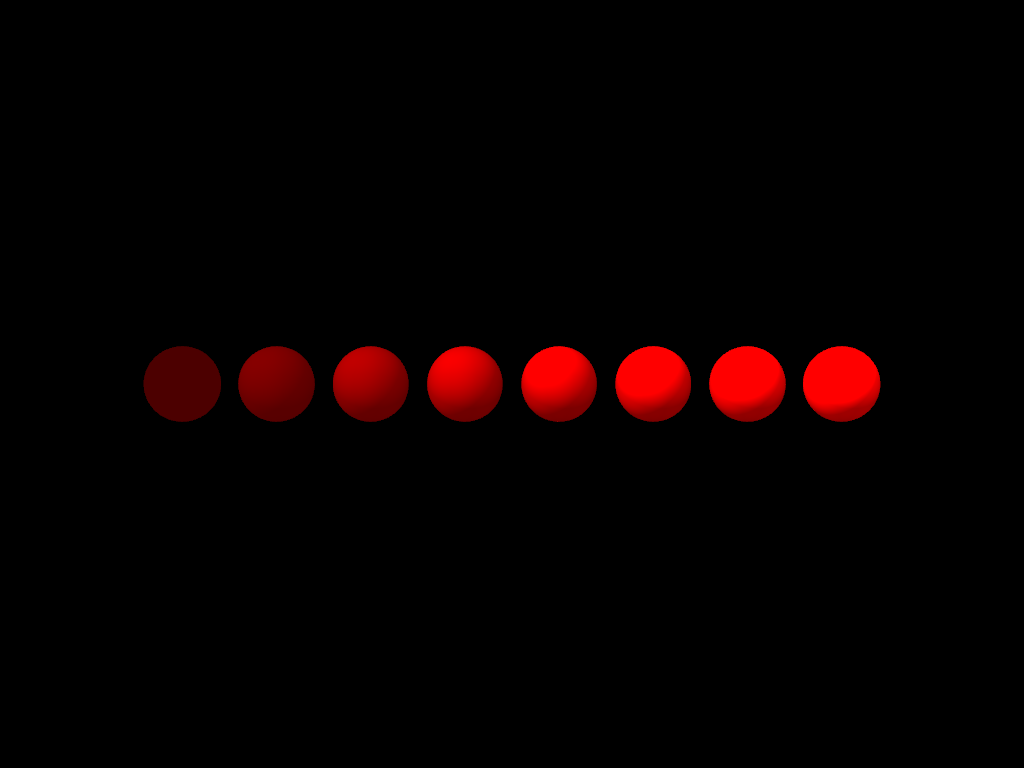

In [32]:
# 구를 만든다.
sphere = vtk.vtkSphereSource()
sphere.SetThetaResolution(100)
sphere.SetPhiResolution(50)
sphere.Update()

# Mapper 생성
sphereMapper = vtk.vtkPolyDataMapper()
sphereMapper.SetInputData(sphere.GetOutput())
sphereMapper.Update()

plotter = pv.Plotter()
plotter.set_background([0, 0, 0]) # 배경색을 검정색으로 변경한다.

light = vtk.vtkLight()
light.SetFocalPoint(1.875, 0.6125, 0)
light.SetPosition(0.875, 1.6125, 1)
plotter.renderer.AddLight(light) # 광원 추가

diffuse = 0.0
position = [0, 0, 0]

for i in range(0, 2):
  for j in range(0, 4):
    actor = vtk.vtkActor()
    actor.SetMapper(sphereMapper)
    actor.GetProperty().SetColor(1, 0, 0)
    actor.GetProperty().SetAmbient(0.3) # 환경광 반사 계수
    actor.GetProperty().SetDiffuse(diffuse) # 난반사광 반사 계수
    actor.GetProperty().SetSpecular(0.0) # 다른 재질 영향을 제거하기 위해 0으로 한다.
    actor.SetPosition(position)

    plotter.add_actor(actor)

    diffuse += 0.125
    position[0] += 1.25

plotter.view_xy()
plotter.show()

##### 정반사광(specular light)

한 방향으로 반사되는 빛으로 빛이 반사되는 방향에서 물체를 바라봐야 한다. 따라서 관찰자의 위치에 따라 광원 효과가 다르게 나타난다.


$$
I_s = k_s(R⋅V)^\alpha i_s
$$

여기서 $k_s$는 정반사광 계수, $i_s$는 정반사광의 강도, $R$은 광원의 반사 방향에 대한 벡터, $V$은 관찰자의 방향 벡터, $\alpha$는 shininess factor이다.

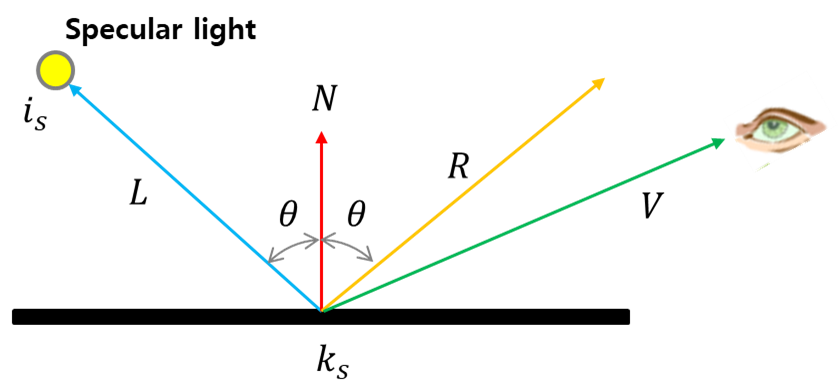

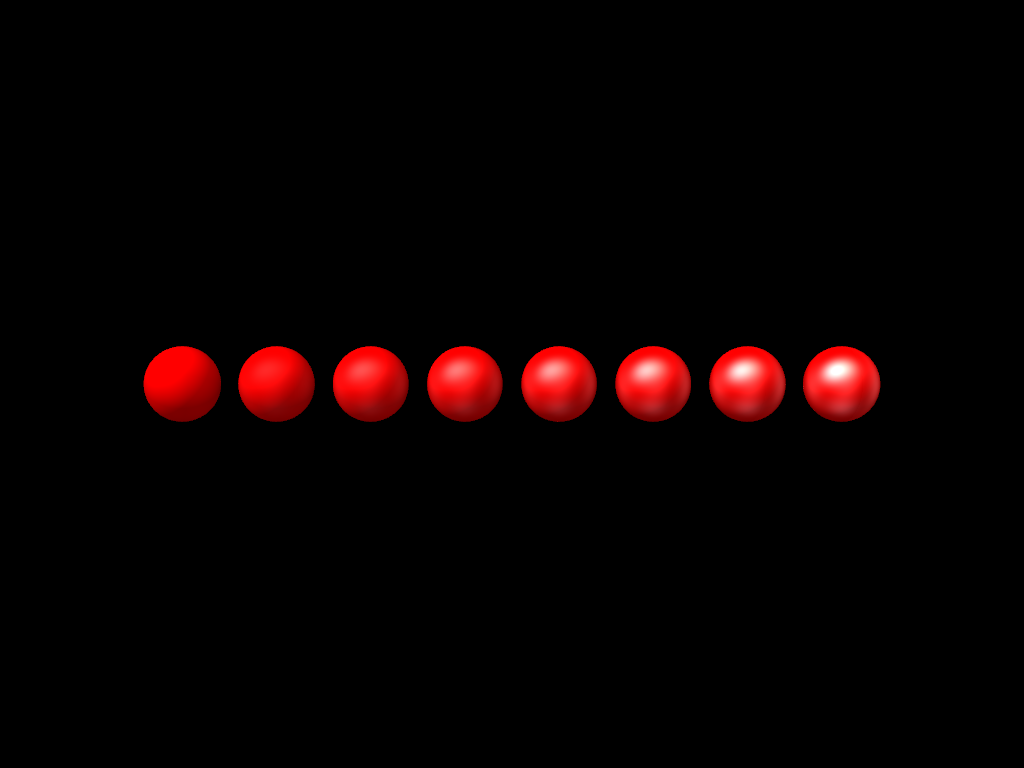

In [33]:
# 구를 만든다.
sphere = vtk.vtkSphereSource()
sphere.SetThetaResolution(100)
sphere.SetPhiResolution(50)
sphere.Update()

# Mapper 생성
sphereMapper = vtk.vtkPolyDataMapper()
sphereMapper.SetInputData(sphere.GetOutput())
sphereMapper.Update()

plotter = pv.Plotter()
plotter.set_background([0, 0, 0]) # 배경색을 검정색으로 변경한다.

light = vtk.vtkLight()
light.SetFocalPoint(1.875, 0.6125, 0)
light.SetPosition(0.875, 1.6125, 1)
plotter.renderer.AddLight(light) # 광원 추가

specular = 0.0
position = [0, 0, 0]

for i in range(0, 2):
  for j in range(0, 4):
    actor = vtk.vtkActor()
    actor.SetMapper(sphereMapper)
    actor.GetProperty().SetColor(1, 0, 0)
    actor.GetProperty().SetAmbient(0.3) # 환경광 반사 계수
    actor.GetProperty().SetDiffuse(0.5) # 난반사광 반사 계수
    actor.GetProperty().SetSpecular(specular) # 정반사광 반사 계수
    actor.GetProperty().SetSpecularPower(5)
    actor.GetProperty().SetSpecularColor(1, 1, 1) # 정반사광 색상
    actor.SetPosition(position)

    plotter.add_actor(actor)

    specular += 0.125
    position[0] += 1.25

plotter.view_xy()
plotter.show()

각 점에 대한 전체 색상은 모든 광원 효과를 합쳐서 계산한다.

$$
I_p = I_a + I_d + I_s
$$

### 셰이딩 모델(Shading Model)

조명 효과를 적용하기 위해서는 보이는 모든 점에 대해 법선 벡터를 알아야 한다. 그러나 형상을 정의할 때 모든 점에 대해 법선을 제공하기는 어렵다. 따라서 다른 방법들이 적용된다.

**Flat Shading**

물체가 평면이라고 가정하고, 한 면에 동일한 법선 벡터를 적용한다. 면은 각 꼭지점에서 법선 벡터가 정의되므로, 각 꼭지점의 법선 벡터를 평균하여 사용한다.

**Gouraud Shading**

한 꼭지점을 공유하는 면들의 법선 벡터를 평균하여, 그 꼭지점의 법선 벡터로 사용한다. 그리고 이를 이용해 그 꼭지점의 색상을 계산한다. 마지막으로 각 꼭지점의 색상을 보간하여 면 내부의 색상을 계산한다.

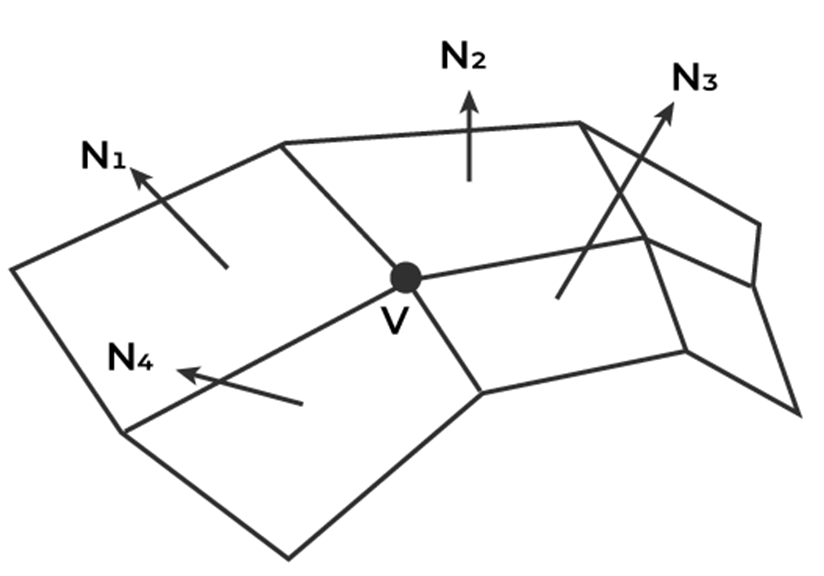

**Phong Shading**

면 내부의 색상을 계산할 때, 각 꼭지점의 법선 벡터를 보간하여 사용한다.

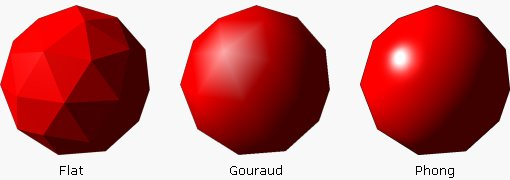

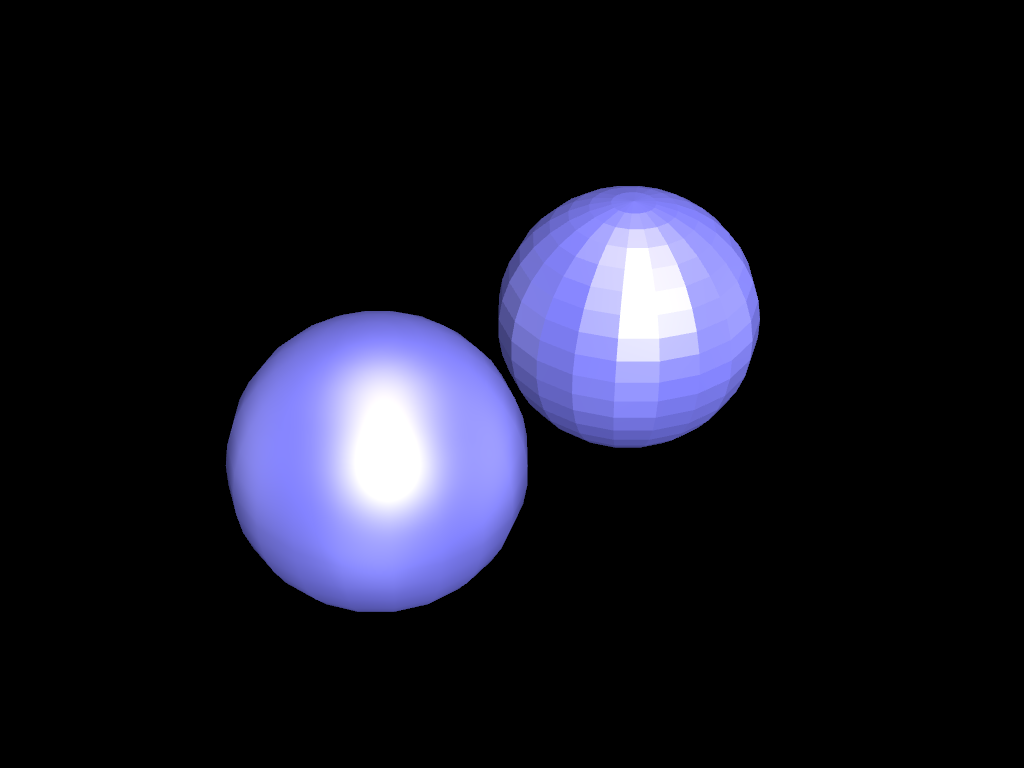

In [38]:
# 구를 만든다.
sphere = vtk.vtkSphereSource()
sphere.SetThetaResolution(20)
sphere.SetPhiResolution(20)
sphere.Update()

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(sphere.GetOutput())
mapper.Update()

plotter = pv.Plotter()
plotter.set_background([0, 0, 0])

light = vtk.vtkLight()
light.SetPosition(0.875, 1.6125, 1)
plotter.renderer.AddLight(light) # 광원 추가

position = [0, 0, 0]

for i in range(0, 2):
  actor = vtk.vtkActor()
  actor.SetMapper(mapper)
  actor.GetProperty().SetColor(0.5, 0.5, 1.0)
  actor.GetProperty().SetAmbient(0.3)
  actor.GetProperty().SetDiffuse(0.5)
  actor.GetProperty().SetSpecular(0.5)
  actor.GetProperty().SetSpecularPower(5)
  actor.GetProperty().SetSpecularColor(1, 1, 1)
  if i == 0:
    actor.GetProperty().SetInterpolationToFlat() # Flat Shading
  else:
    actor.GetProperty().SetInterpolationToPhong() # Phong Shading

  actor.SetPosition(position)

  plotter.add_actor(actor)

  position[0] += 1.25
  plotter.add_actor(actor)

plotter.show()

# Q/A

**바보같은 질문**이란 없습니다.